# Distance Metrics Used in ML

This is a notebook that goes over a few distance metrics commonly used in ML

## What is a distance metric?
A method used to measure the similarity between data points.

In [1]:
import torch
import torch.nn.functional as F


## Euclidean Distance

Euclidean Distance represents the shortest distance between two vectors. It is the square root of the sum of squares of differences between corresponding elements.

In other words, it measures the L2-norm of a difference between vectors and vector spaces.

### Formula
$$d(p,q) = ||p-q|| = \sqrt{\sum^{n}_{i=1}(q_i-p_i)^2} = \sqrt{(p_1-q_1)^2+(p_2-q_2)^2+...+(p_n-q_n)^2}$$

### Use cases
- Use when vectors have different magnitudes
- KNN for classification and regression tasks
- Clustering algorithms like K-means
- Anomaly detection, CV, and PCA

### Benefits
- Intuitive and simple
- Finds the shortest straight line distance
- O(n) runtime
- Effective in low dimensions

### Limitations
- 	Curse of Dimensionality: In high-dimensional spaces, Euclidean distance can become less effective because the distance between any two points tends to be similar, making it harder to distinguish between close and far points.
- Sensitive to Outliers: Euclidean distance can be significantly skewed by outliers or extreme values, which may distort the true relationships in the data.
- Scale Sensitivity: It is sensitive to the scale of the data. Features on larger scales can disproportionately influence the distance, necessitating standardization or normalization of data prior to using Euclidean distance.
- Not Suitable for Categorical Data: It is inherently designed for continuous variables and doesn’t work directly with categorical data unless they are appropriately encoded.
- Ignoring Correlation: The standard Euclidean metric treats all dimensions as independent and does not account for correlations between features. This might lead to misleading distance calculations if features are correlated.

### Example
Given $\vec{p} = [1,3,4,1]$ and $\vec{q} = [3,2,1,1]$, the distance should be
$$d(p,q) = \sqrt{(1-3)^2+(3-2)^2+(4-1)^2+(1-1)^2}=\sqrt{4+1+9+0}=\sqrt{14}\approx3.741$$



In [2]:
p = torch.tensor([1,3,4,1],dtype=torch.float32)
q = torch.tensor([3,2,1,1],dtype=torch.float32)
print(torch.dist(p,q))

tensor(3.7417)


## Cosine Similarity

Cosine similarity measures the cosine of the angle between two vectors. It is computed by taking the dot product of the vectors and dividing it by the product of their magnitudes. This metric is not affected by the size of the vector but only by the angle between them. This means that vectors with large or small values will have the same cosine similarity as long as they point in the same direction. The cosine similarity is between -1 and 1, where 1 means an angle of 0 (vectors are as close as they can be), 0 means orthogonal, and -1 means that the vectors are pointing in opposite directions.

### Formula
$$S_C(A,B)=\cos(\theta)=\frac{A \cdot B}{||A||||B||}=\frac{\sum_{i=1}^{n}A_iB_i}{\sqrt{\sum_{i=1}^{n}A_i^2} \cdot \sqrt{\sum_{i=1}^{n}B_i^2}}$$

### Use cases
- Text Similarity: Cosine similarity is extensively used to assess the similarity between two text documents. It is a standard technique in document clustering, search engines, and recommender systems to find documents similar to a given query document.
- Recommendation Systems: It helps in building user or item profiles based on attributes or preferences, and then recommends items by calculating similarity scores between these profiles.
- Clustering: In clustering algorithms like K-means, cosine similarity can be used instead of the Euclidean distance when the magnitude of the attribute vectors is not important.
- Gene Expression Analysis: It helps in clustering genes with similar expression patterns, useful in understanding biological processes and disease states.
- Image Similarity: In CV, cosine similarity can compare the similarity of feature vectors extracted from images, useful in image retrieval systems.

### Benefits
- Independent of magnitude. Useful when the magnitude of vectors does not carry meaningful information.
- Less affected by high dimensionality compared to Euclidean distance, making it suitable for applications like text processing where data is typically high-dimensional and sparse.
- O(n) time complexity
- 
### Limitations
- Sensitivity to Vector Orientation: Cosine similarity only captures the orientation similarity and completely ignores the magnitude. In cases where magnitude is important, this might lead to misleading results.
  - Comparing the similarity of image embeddings based on pixel intensities 
- Sparse Data Issues: In extremely sparse data, the cosine similarity might be dominated by the large number of zeros rather than the actual matching non-zero entries, potentially leading to less meaningful similarity scores.
- No Upper Bound for Clustering: In clustering contexts, the lack of an upper bound for cosine similarity can make it challenging to define a threshold for cluster convergence.
- Non-Metric Distance: Cosine similarity does not satisfy the triangle inequality, which is a requirement for a metric space. This can lead to unintuitive results in some mathematical contexts.
-Not useful for negative value is or high degree of correlation data

### Example
Given $\vec{p} = [1,3,4,1]$ and $\vec{q} = [3,2,1,1]$, the distance should be
$$d(p,q) = \frac{1 \cdot 3 + 3 \cdot 2 + 4 \cdot 1 + 1 \cdot 1}{\sqrt{1^2 + 3^2 + 4^2 + 1^2} \cdot \sqrt{3^2 + 2^2 + 1^2 + 1^2}} = \frac{14}{\sqrt{27} \cdot \sqrt{15}} \approx 0.696$$



In [3]:
print(F.cosine_similarity(p,q, dim=0))

tensor(0.6957)


## Dot Product Similarity

Similar to cosine similarity similarity, but it is magnitude-dependent. Dot product values can range from negative infinity to positive infinity, with negative values indicating opposite directions, positive values indicating the same direction, and a value of 0 when the vectors are perpendicular. Larger Dot Product values indicate greater similarity.

### Formula
$$d(A,B)=||A||||B||\cos(\theta)=\sum_{i=1}^{n}A_iB_i$$

### Use cases
- Equivalent to cosine similarity with normalized datasets, and computational faster.
- Recommendation Systems: In collaborative filtering, dot product similarity can help in predicting a user’s rating of an item based on the ratings of similar items or similar users.
- Image Similarity: In computer vision, dot products are used to measure the similarity between feature vectors extracted from images, aiding in tasks like image classification and retrieval.


### Benefits
- Sensitivity to Magnitude: When not normalized, the dot product considers both the direction and magnitude of vectors, which can be beneficial in applications where the magnitude of the vector elements is significant
- Alignment Measurement: The dot product directly measures how aligned two vectors are in space, providing a straightforward interpretation of similarity in terms of angle between vectors.
- O(n) time complexity
  
### Limitations
- Sensitivity to Vector Length: The raw dot product is sensitive to the length of the vectors, which can be a drawback if only the direction (and not the magnitude) of vectors is of interest. This is often mitigated by normalizing the vectors and using cosine similarity instead.
- Does Not Capture Complex Patterns: The dot product measures linear relationships and may not effectively capture more complex interactions between features, unlike some kernel methods or advanced distance metrics
- Dependence on Origin: Being a measure in a vector space, the dot product’s effectiveness can be influenced by the origin with respect to which the vectors are defined. This can affect its applicability in some machine learning algorithms where relative, not absolute, positioning is key.

### Example
Given $\vec{p} = [1,3,4,1]$ and $\vec{q} = [3,2,1,1]$, the distance should be
$$d(p,q) = 1 \cdot 3 + 3 \cdot 2 + 4 \cdot 1 + 1 \cdot 1= 14$$

In [4]:
print(torch.dot(p,q).item())

14.0


##  Manhattan Distance (L1 norm)
Calculates distance by summing the absolute differences along each dimension. Manhattan distance is suitable for scenarios involving grid-like movement or when individual dimensions have varying importance. In most cases, Manhattan distance produces larger values than Euclidean distance for the same pair of points. As the data dimensionality increases, Manhattan Distance becomes the preferred choice compared to the Euclidean distance metric.

### Formula
$$d(p,q)=\sum_{i=1}^{n}|p_i-q_i|$$

### Use cases
- Grid-Based Pathfinding: Used in applications like A* algorithm where movement is restricted to grid-based paths.
- Recommender Systems: Useful in collaborative filtering when preferences are modeled on a grid.
- Image Processing: When comparing pixel differences in images where movement is restricted to horizontal or vertical directions.
- Clustering Algorithms: Applied in clustering algorithms like k-means or k-medians where clusters can form in a grid-like pattern.
- Bioinformatics: To measure similarity between DNA sequences or protein structures in a grid-like comparison.



### Benefits
- Less sensitive to outliers
- Appropriate for data that lies on a grid, or where individual dimensions have varying importance
- more effective metric in cases when discrete or binary attributes are present in the dataset as the path derived from the given values of attributes can be perceived in reality.
- Faster for high-dimensional data
- O(n) time complexity
  
### Limitations
- Less Suitable for Continuous Data: Not as effective for data in continuous space where direction and diagonal distances matter.
- Bias Towards Axis-Aligned Data: Assumes movement is only along axes, which might not reflect true distances in certain applications.
- Non-Differentiability: Unlike Euclidean distance, it is not differentiable, which can be a disadvantage in gradient-based optimization methods.
- Potential for Misleading Metrics: May give misleading results if data does not conform to a grid-like structure.
- Ignores diagonal movement

### Example
Given $\vec{p} = [1,3,4,1]$ and $\vec{q} = [3,2,1,1]$, the distance should be
$$d(p,q) = |1-3| + |3-2| + |4-1| + |1-1| = 6$$

In [5]:
print(torch.dist(p,q,1).item())

6.0


## Canberra Distance

A weighted version of Manhattan distance that emphasizes larger differences between the components. It is often used for data that is not necessarily normalized or standardized. Also useful for data scattered around an origin, as it is biased for measures around the origin and very sensitive for values close to zero.


### Formula
$$d(p,q)=\sum_{i=1}^{n}\frac{|p_i-q_i|}{|p_i| + |q_i|}$$

### Use cases
- Primarily used to measure distance for sparse data
- Used as a metric for comparing ranked lists
- Intrusion detection in computer security.
- Used to analyze the gut microbiome in different disease states.

### Benefits
- Scale Invariance: It normalizes the distance calculation, which makes it relatively insensitive to the scale of measurements, as it considers the relative difference rather than the absolute difference.
- Robust to outliers
- O(nlog(n)) time complexity
  
### Limitations
- Sensitive to the order in which the components are presented, which can affect its performance in some applications.
- Sensitivity to Zeros: It can dramatically amplify the influence of small changes where the compared values are near zero, which may not always be desirable.
- More sensitive to small differences
- Not a True Metric: It doesn’t always satisfy the triangle inequality, which can be a drawback in certain mathematical contexts where the metric properties are essential.

### Example
Given $\vec{p} = [1,3,4,1]$ and $\vec{q} = [3,2,1,1]$, the distance should be
$$d(p,q)=\frac{|1-3|}{|1|+|3|} + \frac{|3-2|}{|3|+|2|} + \frac{|4-1|}{|4|+|1|} + \frac{|1-1|}{|1|+|1|}=\frac{2}{4} + \frac{1}{5} + \frac{3}{5} + \frac{0}{2}=1.3$$



In [14]:
print(torch.sum(torch.abs(p - q) / (torch.abs(p) + torch.abs(q))).item())

1.2999999523162842


## Minkowski Distrance

A generalized form of Euclidean and Manhattan distance, that uses the parameter called the order $p$ to allow for difference distance measures to be calculated. When p is set to 1, the Minkowski returns the Manhattan distance, and when p is set to 2, the Euclidean distance is returned.


### Formula
$$d(X,Y)=\left(\sum_{i=1}^{n}|x_i-y_i|^p\right)^{\frac{1}{p}}$$

### Use cases
- The Minkowski metric is most useful for numerical datasets where you want to determine the similarity of size between multiple datapoint vectors.
- It's used in general distance measurement


### Benefits
- Flexibility: The Minkowski distance is flexible because it includes other distances (like Euclidean and Manhattan) as special cases, which can be controlled by the choice of the parameter $p$.
- Generalization: It can easily be adapted to different types of data and problems by adjusting $p$ 
- Intuitive: The metric is geometrically intuitive, making it easy to explain and visualize in the context of physical space.
  
### Limitations
- Sensitive to Dimensionality: Like other distance measures, it can be sensitive to high dimensionality (curse of dimensionality), where distances become less meaningful.
- Scale Dependency: It requires feature scaling as it is sensitive to the magnitudes of the input features
- Computationally Intensive for Large $p$ : As $p$ increases, the computation (especially for very large values of $p$ ) can become numerically unstable due to the computation of large powers and roots.
- Choice of $p$ : Choosing the appropriate value of $p$  can be non-trivial and may require domain knowledge or experimentation.
- Sensitive to outliers

### Example
Given $\vec{p} = [1,3,4,1]$, $\vec{q} = [3,2,1,1]$, and $p=3$ the distance should be
$$d(\vec{p},\vec{q})=\left(|1-3|^3 + |3-2|^3 + |4-1|^3 + |1-1|^3\right)^{\frac{1}{3}} = (8 + 1 + 27)^{\frac{1}{3}} \approx 3.302 $$

In [15]:
print(torch.dist(p,q,3).item())

3.301927328109741


## Chebyshev Distance

The limiting case of $p$ reaching infinity for the Minkowski distance. Chebyshev distance is the maximum distance along each axis in a given space. It is useful when dealing with high-dimensional data or in optimization problems.

### Formula
$$d(X,Y)=\lim_{p\to\infty}\left(\sum_{i=1}^{n}|x_i-y_i|^p\right)^{\frac{1}{p}}=\max_{i}(|x_i-y_i|)$$

### Use cases
- It used in warehouse logistics as it measures the time an overhead crane takes to move an object
- Also used in optimization algorithms for computer-aided manufacturing applications
- Clustering algorithms
- Anomaly Detection

### Benefits
- O(n) runtime
- Simplicity: It’s computationally simple as it requires minimal calculations (just comparisons).
- Robust to Outliers: The metric focuses only on the dimension with the maximum difference, so it is less sensitive to small changes in other dimensions.
- Non-Euclidean Suitability: It is useful in scenarios where the Euclidean distance (L2 norm) does not apply well, especially in grid-like path planning or strategic games.
  
### Limitations
- Less Sensitive: Since it only considers the maximum difference, it may ignore significant variations in other dimensions, which can be a drawback in applications like clustering or outlier detection where overall structure in multi-dimensional space matters.
- Axis Aligned: It aligns strictly along axes, which can be unrealistic in scenarios where diagonal or more fluid movements are common.

### Example
Given $X = [1,3,4,1]$, $Y= [3,2,1,1]$, and the distance should be
$$d(X,Y)=\max_{i}(|x_i-y_i|) = |4-1| = 3$$

In [16]:
print(torch.max(torch.abs(p - q)).item())

3.0


## Mahalanobis 

## Pearson Correlation Coefficient

## Levenshtein

## Hamming Distance
The Hamming distance between two strings or vectors of equal length is the number of positions at which the corresponding symbols are different. In the context of machine learning, Hamming distance is used to measure the difference between two binary vectors, and it counts the number of positions at which the corresponding bits are different. It is also equivalent to summing the result of an XOR operation on two vectors.

### Formula
$$d(A,B)= \text{Number of 1s in} (A \oplus B) = \sum^{n}_{i=1}(A \oplus B)_i$$

### Use cases
- Heavily used in NLP as there are many processes that produce binary or sparse vectors, such as TF-IDF, BM25, and SPLADE
- Used in genetics for comparing the similarity between genetic sequences.
- Also used in information retrieval when comparing binary hashes.
- Used in clustering and classifying categorical data when the features are binary or nominal.

### Benefits
- O(n) runtime
- Very effective with binary data and categorical data
  
### Limitations
- Not good for measuring the difference between vector embeddings
- Can only be used for same length vectors
- Not useful for non=binary data
- Not Weighted: Hamming distance treats all discrepancies between characters as equally significant, which may not be appropriate in contexts where some differences should weigh more heavily than others.
- Limited to Exact Matches: It counts exact position matches and might not be suitable for measuring similarity in a more nuanced manner, such as similar but not exactly matching strings.

### Example
Given $A = [0,1,1,0,0,1,1,1]$, $B= [0,1,0,1,0,1,1,0]$, the distance should be
$$d(A,B)=\sum^{n}_{i=1}(A \oplus B)_i=\sum^{n}_{i=1}([0,0,1,1,0,0,0,1])_i = 3$$

In [22]:
A = torch.tensor([0,1,1,0,0,1,1,1])
B = torch.tensor([0,1,0,1,0,1,1,0])
print(torch.sum(A ^ B).item())

3


## Jaccard Distance

Jaccard similarity is a measure of similarity between two sets. It calculates the size of the intersection between two sets divided by the size of their union. This measure is useful in text classification or recommendation systems.

### Formula
$$J(A,B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|}$$
$$d_J(A,B) = 1 - J(A,B) = \frac{|A \cup B| - |A \cap B|}{|A \cup B|}$$


### Use cases
- Text Mining and Document Clustering: Jaccard distance is used to measure the dissimilarity between text documents. It helps in clustering documents by calculating the similarity between sets of terms.
- Recommendation Systems: In recommendation engines, Jaccard distance can help measure the similarity between users’ preferences or items based on the intersection over union of sets, such as genres liked, products bought, or movies watched.
- Biological and Ecological Data Analysis: Jaccard index is used for comparing the similarity and diversity of sample sets in ecological and biological data.
- Image Processing: Jaccard index can be used to compare the similarity of image data, particularly in tasks like image segmentation, where it measures how closely the segmentation matches the ground truth data.
- Market Basket Analysis: It helps in understanding the similarity between different products bought by customers by comparing the sets of products in their baskets.

### Benefits
- O(n) runtime
- It is unaffected by the size of dataset.
- It is a reliable option for determining similarity when the sets are of various sizes.
- It may be used to compare the similarity of any kind of data, including time series data, photos, text, and images.
- Effective with Sparse Data: Performs well in scenarios where the data is sparse, which is common in sets like text data or user interactions in recommendation systems.
  
### Limitations
- Ignores magnitude of sets
- Limited to Binary or Set Data: Jaccard distance is applicable primarily to sets or binary attributes, limiting its use in continuous or multi-dimensional data unless the data is transformed.
- Can Be Sensitive to Outliers: If there are elements that are rare but significant, their effect might be diluted by the large number of common but less significant items.
- does not consider the sets' order or frequency of elements.
- High Dimensional Data: In high dimensional spaces, the Jaccard index may lead to a sparse matrix problem, where most distances are very close to 1 (i.e., indicating almost no similarity), which may not be very informative.

### Example
Given $A = [0,1,1,0,0,1,1,1]$, $B= [0,1,0,1,0,1,1,0]$, the distance should be
$$A \cap B = 3, A\ cup B = 6$$
$$J(A,B) = \frac{|A \cap B|}{|A \cup B|} = 1/2$$
$$d_J(A,B) = 1 - J(A,B) = \frac{|A \cup B| - |A \cap B|}{|A \cup B|} = \frac{6-3}{6} = 1/2$$

In [28]:
print(1-(torch.sum(A & B).item() / torch.sum(A | B).item()))

0.5


## Supremeum Distance

# How to pick a metric

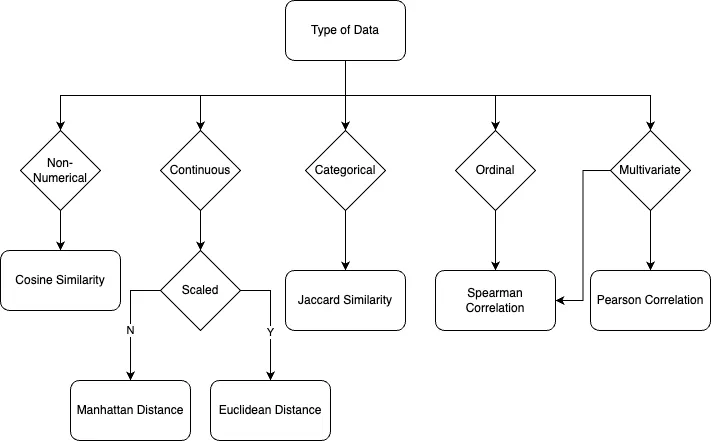

### TLDR

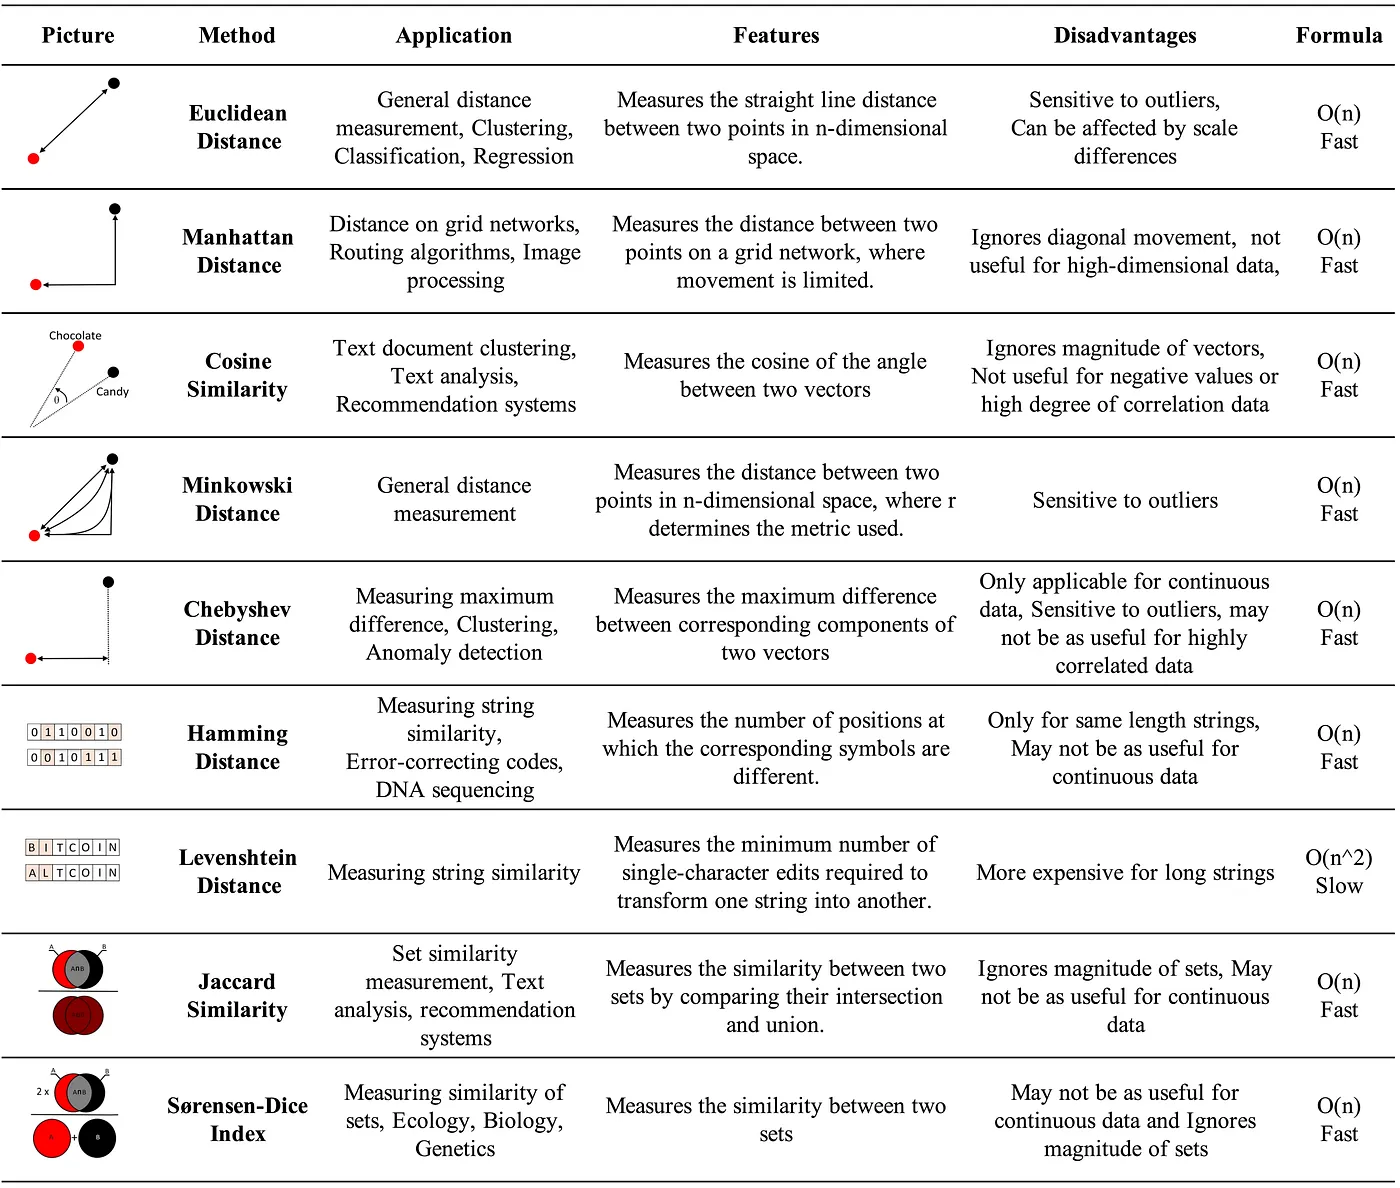
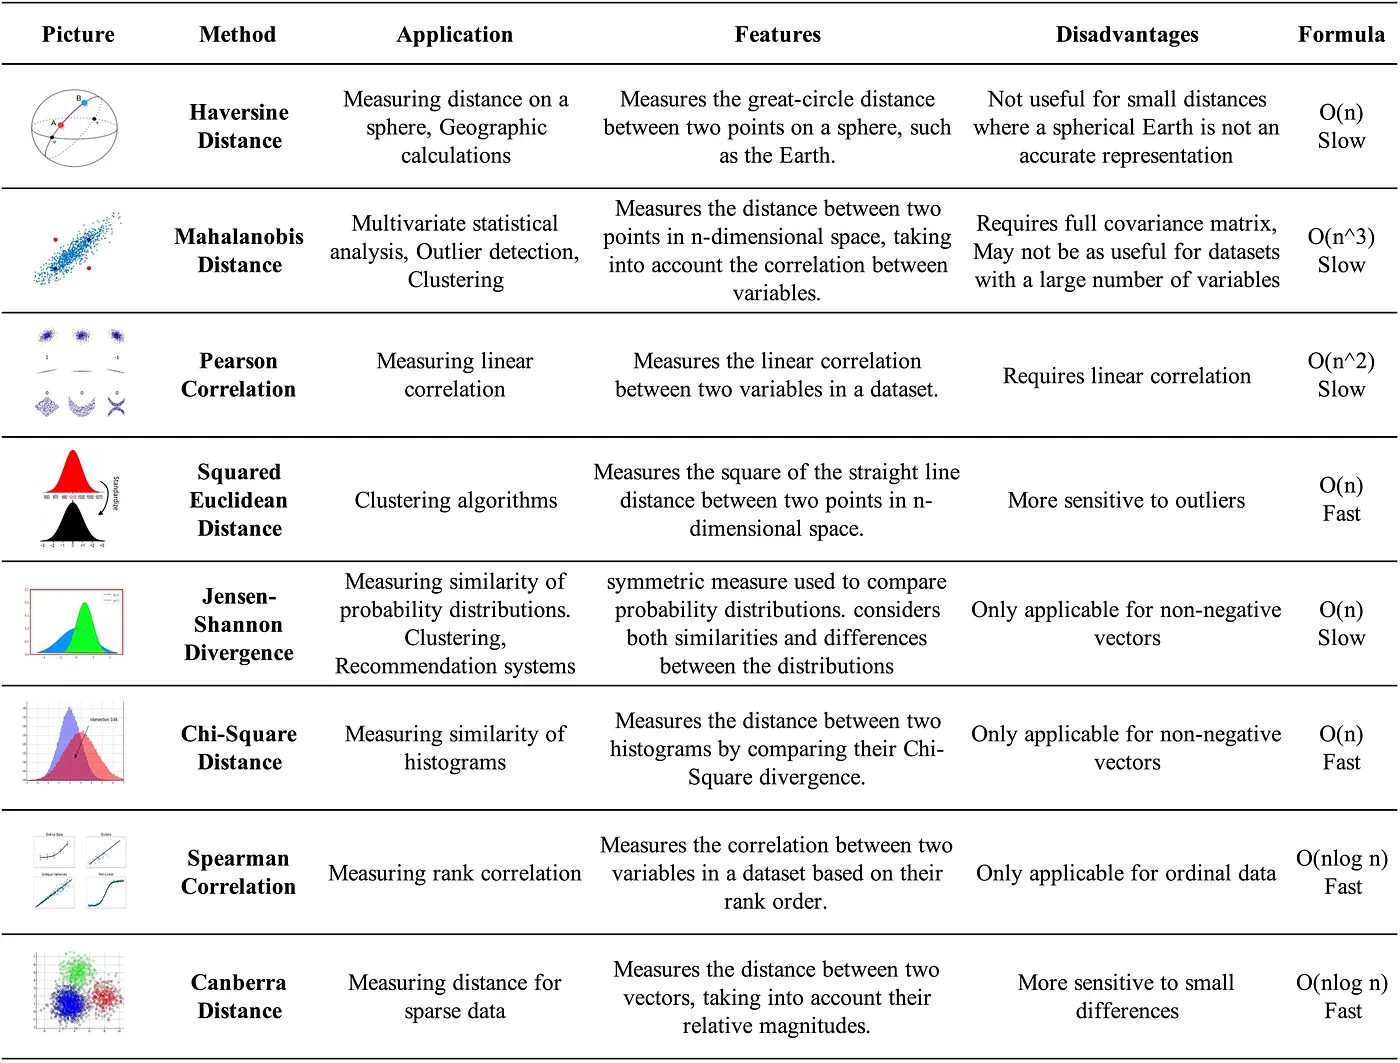

# References
https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/
https://www.youtube.com/watch?v=QjcSLm_2bMw 
https://www.pinecone.io/learn/vector-similarity/
https://medium.com/advanced-deep-learning/understanding-vector-similarity-b9c10f7506de
https://medium.com/@eskandar.sahel/exploring-common-distance-measures-for-machine-learning-and-data-science-a-comparative-analysis-ea0216c93ba3
https://zilliz.com/blog/similarity-metrics-for-vector-search